<a href="https://colab.research.google.com/github/Abhay069/Used-car-price-prediction-model-./blob/main/Used_car_price_prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
# lLoading the data from csv file to pandas dataframe
cars_data = pd.read_csv("/content/car data.csv")
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the no rows and columns
cars_data.shape

(301, 9)

In [ ]:
# getting some information about the dataset
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing value
cars_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# checking the distribution of categorical data
print(cars_data.Fuel_Type.value_counts())
print(cars_data.Seller_Type.value_counts())
print(cars_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
cars_data.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
cars_data.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" column
cars_data.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

# for firt five row
cars_data.head()

<ipython-input-7-c94896aa867a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-7-c94896aa867a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-7-c94896aa867a>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [ ]:
X = cars_data.drop (['Car_Name','Selling_Price'],axis=1)
Y = cars_data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:

print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training And Test data

In [ ]:
X_train, X_test, Y_train,  Y_test = train_test_split(X,Y, test_size= 0.1 , random_state=2)

Model Training

1. Linear Regression

In [ ]:
# loading linerar regression model
lin_reg_model = LinearRegression()

In [ ]:
# fitting the data in linear Regression Model
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)
print(training_data_prediction)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared error:' , error_score)


R squared error: 0.8799451660493711


Visualize the actual price and predicted price

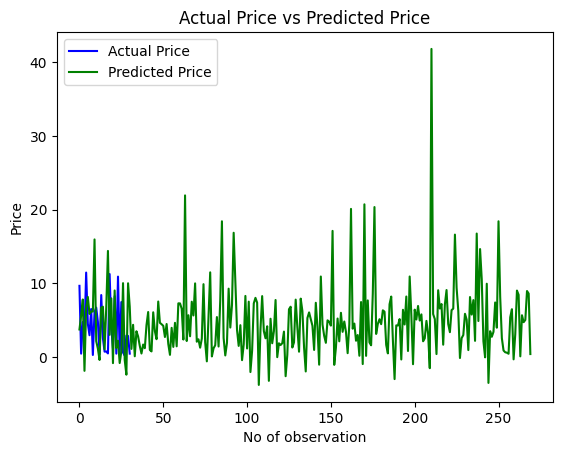

In [ ]:
#using other plot method to compair
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(training_data_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of observation')
plt.ylabel('Price')
plt.legend()
plt.show()

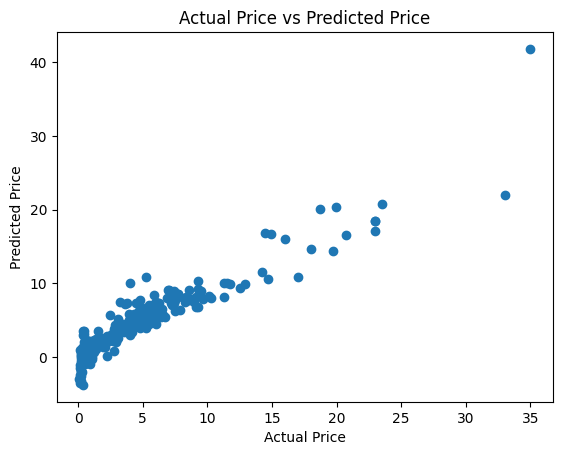

In [ ]:
# using scatter plot
plt.scatter(Y_train , training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
# prediction on test data (X_test)
test_data_prediction = lin_reg_model.predict(X_test)
print(test_data_prediction)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:' , error_score)

R squared error: 0.8365766715027051


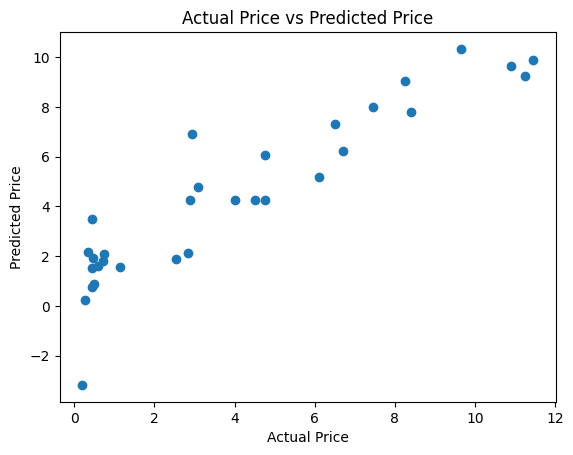

In [ ]:
# using scatter plot
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

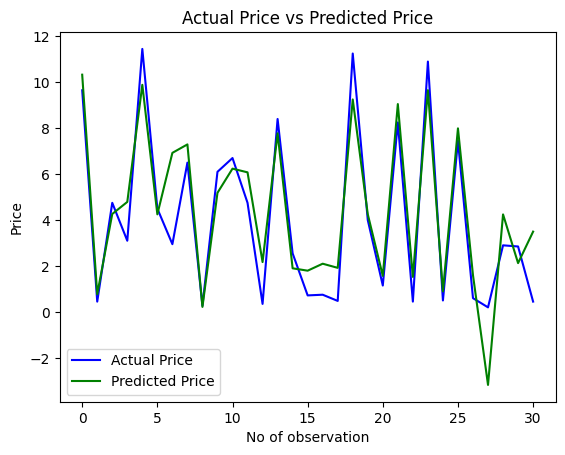

In [ ]:
#using other plot method to compair
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(test_data_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of observation')
plt.ylabel('Price')
plt.legend()
plt.show()

2. Lasso Regression

In [ ]:
# loading Lasso regression
lass_reg_model = Lasso()

In [ ]:
# fitting the data in lasso regression
lass_reg_model.fit(X_train , Y_train)

Lasso()

In [ ]:
# model regression :
# predicting on training data
training_data_prediction = lass_reg_model.predict(X_train)
print(training_data_prediction)

[ 3.56679076e+00  5.60257564e+00  8.28781371e+00 -8.30814314e-01
  5.27539880e+00  6.50367937e+00  5.73552938e+00  6.41187200e+00
  4.78218845e+00  1.54979701e+01  2.60868685e+00  1.68164537e+00
  4.65587149e-01  5.14260426e+00  6.87569869e+00  1.60372469e+00
  5.30299396e+00  1.39150016e+01  2.86877663e+00  6.44421824e+00
  9.38523430e-02  9.99955865e+00  1.79683394e+00  2.66121014e+00
  2.10269105e-02  1.39327221e+00  1.01152846e+01  4.55985698e-01
 -1.29850564e+00  8.96458834e+00  6.87473286e+00  2.80689227e+00
  4.00679563e+00  8.93707044e-01  3.11243615e+00  2.61344453e+00
  2.13519495e+00  1.21115483e+00  2.20395877e+00  1.77253883e+00
  4.40123646e+00  4.26379158e+00  1.53108120e+00  2.67410546e+00
  4.37186991e+00  2.41613935e+00  2.90706331e+00  6.07491388e+00
  5.02364608e+00  4.39669701e+00  3.59203190e+00  2.67643327e+00
  4.41172590e+00  2.31675779e+00  1.01438277e+00  3.68609748e+00
  1.50265941e+00  5.02295620e+00  2.07310584e+00  6.19074097e+00
  7.81981153e+00  5.36371

In [ ]:
# r squre error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squred error : ' , error_score)

R squred error :  0.8427856123435794


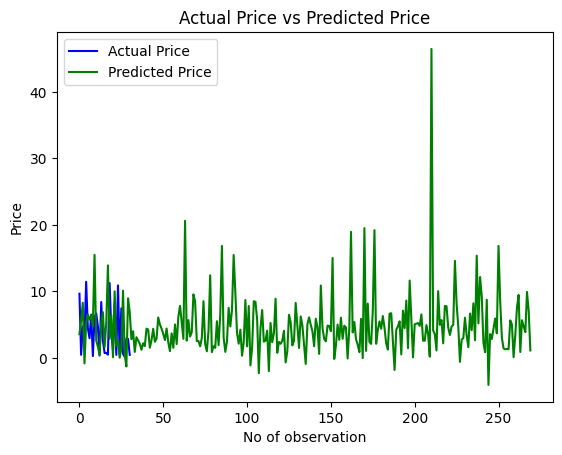

In [ ]:
#using other plot method to compair
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(training_data_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of observation')
plt.ylabel('Price')
plt.legend()
plt.show()

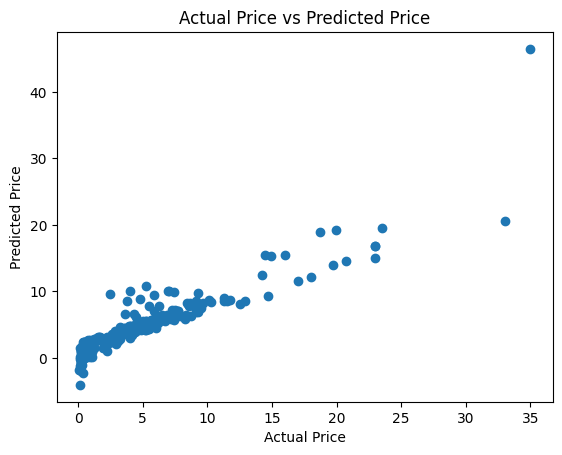

In [ ]:
# using scatter plot
plt.scatter(Y_train , training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
# prediction test data(X_test):
test_data_prediction = lass_reg_model.predict(X_test)
print(test_data_prediction)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [ ]:
# r squred error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('r squred error :', error_score)

r squred error : 0.8709167941173195


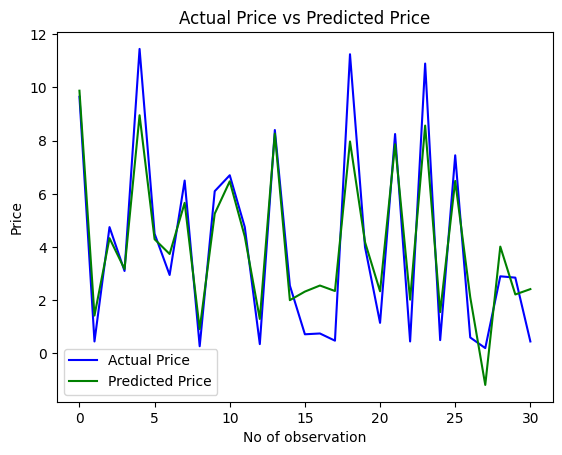

In [ ]:
#using other plot method to compair
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Price')
plt.plot(test_data_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of observation')
plt.ylabel('Price')
plt.legend()
plt.show()

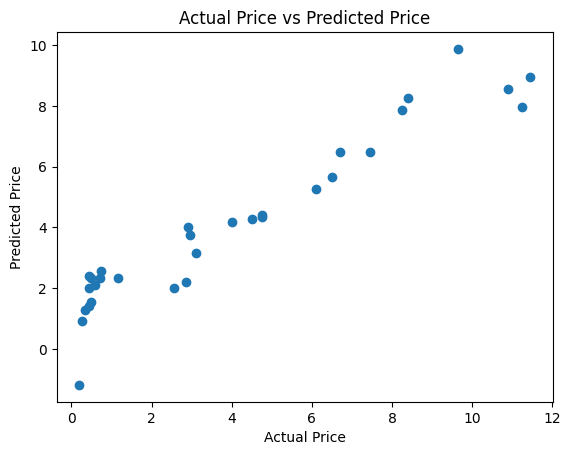

In [ ]:
# using scatter plot
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()